In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
import math, copy

In [ ]:
# Add file path as per the location of the dataset
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
df_hp_price = df[['horsepower', 'price']]

In [ ]:
df_hp_price

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0
...,...,...
200,114,16845.0
201,160,19045.0
202,134,21485.0
203,106,22470.0


In [ ]:
x = np.array(df_hp_price['horsepower'])
x = x.reshape(x.shape[0],)
x = x.astype(np.float64)

y = np.array(df_hp_price['price'])
y = y.reshape(y.shape[0],)

In [ ]:
# Set random seed for reproducibility

# Ensures that everytime the same set of random values are generated
np.random.seed(42)

# Load our data set
x_train = x   #features
x_train_backup = x

y_train = y #target value
y_train_backup = y

## Cost Function

In [ ]:
#Function to calculate the cost
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):

      # calculating the predictions or y_pred
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

## Normalize dataset and run gradient descent

Iteration    0: Cost 4.87e-01  dj_dw: -8.081e-01, dj_db: -1.581e-16   w:  1.616e-02, b: 3.16278e-18
Iteration  100: Cost 1.79e-01  dj_dw: -1.072e-01, dj_db:  1.571e-17   w:  7.031e-01, b: 5.51754e-17
Iteration  200: Cost 1.74e-01  dj_dw: -1.421e-02, dj_db: -4.062e-17   w:  7.942e-01, b: 5.26841e-17
Iteration  300: Cost 1.73e-01  dj_dw: -1.885e-03, dj_db:  2.924e-17   w:  8.063e-01, b: 4.92722e-17
Iteration  400: Cost 1.73e-01  dj_dw: -2.500e-04, dj_db:  2.491e-17   w:  8.079e-01, b: 4.81566e-17
Iteration  500: Cost 1.73e-01  dj_dw: -3.315e-05, dj_db:  9.748e-18   w:  8.081e-01, b: 4.41815e-17
Iteration  600: Cost 1.73e-01  dj_dw: -4.397e-06, dj_db: -3.249e-17   w:  8.081e-01, b: 4.63153e-17
Iteration  700: Cost 1.73e-01  dj_dw: -5.831e-07, dj_db:  1.029e-17   w:  8.081e-01, b: 4.23293e-17
Iteration  800: Cost 1.73e-01  dj_dw: -7.733e-08, dj_db: -5.416e-19   w:  8.081e-01, b: 4.23509e-17
Iteration  900: Cost 1.73e-01  dj_dw: -1.026e-08, dj_db:  2.275e-17   w:  8.081e-01, b: 3.67403e-17


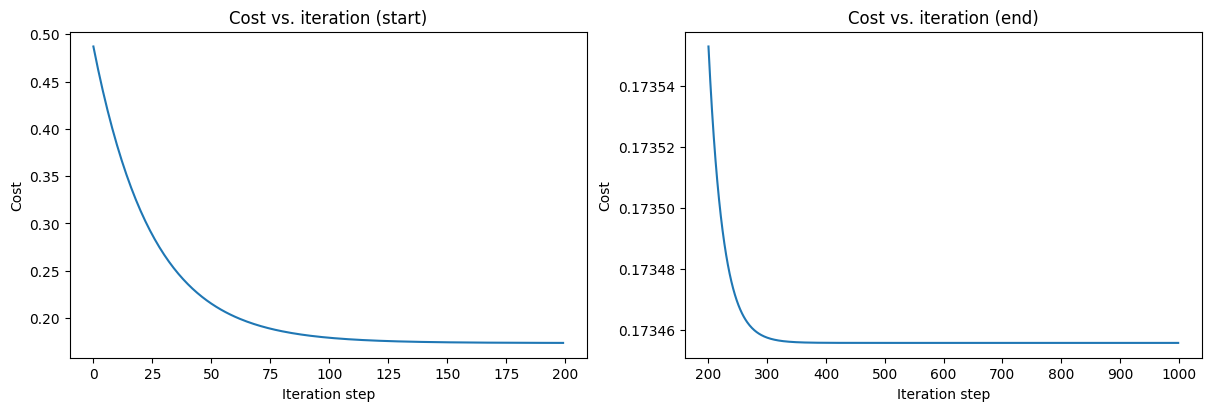

In [ ]:
# Normalize x and y to bring them to a similar scale
x_mean = np.mean(x_train)
x_std = np.std(x_train)
x_train = (x_train - x_mean) / x_std

y_mean = np.mean(y_train)
y_std = np.std(y_train)
y_train_backup = y_train
y_train = (y_train - y_mean) / y_std

# Initialize parameters
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 1000
tmp_alpha = 0.02  # Reduced learning rate

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient
)

# Rescale final parameters to the original scale (if needed)
w_final_rescaled = w_final * y_std / x_std
b_final_rescaled = b_final * y_std + y_mean - (w_final_rescaled * x_mean)

print(f"(w, b) found by gradient descent: ({w_final_rescaled:.4f}, {b_final_rescaled:.4f})")

# Plot cost vs iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:200])
ax2.plot(200 + np.arange(len(J_hist[200:])), J_hist[200:])
ax1.set_title("Cost vs. iteration (start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
ax1.set_xlabel("Iteration step")
ax2.set_xlabel("Iteration step")
plt.show()

## Rescaling and plotting the predicted values

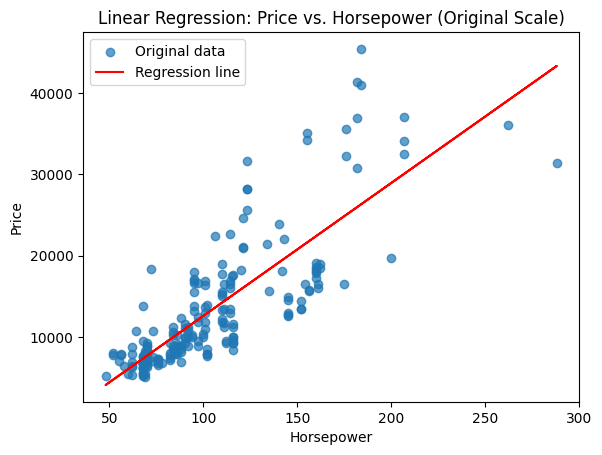

In [ ]:
# Compute predictions directly on the original scale
y_pred_original = w_final_rescaled * x_train_backup + b_final_rescaled

# Plot original data and the regression line
plt.scatter(x_train_backup, y_train_backup, label="Original data", alpha=0.7)
plt.plot(x_train_backup, y_pred_original, label="Regression line", color="red")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Linear Regression: Price vs. Horsepower (Original Scale)")
plt.legend()
plt.show()